# Notebook for input data analysis 

In [3]:
import pandas as pd
import numpy as np 
import scipy.sparse as sps
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')

## URM Analysis 

In [ ]:
dataset = pd.read_csv('data_train.csv', names=["user", "item", "interaction"], header=0)
dataset

#### Extracting some statistics from the URM 

In [ ]:
unique_users, min_users, max_users = len(dataset.user.unique()), dataset.user.min(), dataset.user.max()
unique_items, min_items, max_items = len(dataset.item.unique()), dataset.item.min(), dataset.item.max()
print('Num Users: {}, Min: {}, Max: {}'.format(unique_users, min_users, max_users))
print('Num Items: {}, Min: {}, Max: {}\n'.format(unique_items, min_items, max_items))
print('Missing users:', (max_users + 1)-unique_users)
print('Missing items:', (max_items + 1)-unique_items, '\n')

n_interactions = len(dataset)

print ("The number of interactions is {}\n".format(n_interactions))

# Check on average how many interaction we have for each user 
print ("Average interactions per user {:.2f}".format(n_interactions/unique_users))

# Check on average how much interaction we have for each items
print ("Average interactions per item {:.2f}\n".format(n_interactions/unique_items))

# Measure how much each user intercat on average with all the items inside the dataset
# In such a case is Interactions = NumUser*NumTem we will have 0% of data sparsity 
print ("Sparsity {:.2f} %".format((1-float(n_interactions)/(unique_items*unique_users))*100))

In [ ]:
# Find for each user the number of interaction 

grouped_users = dataset.groupby(['user']).count()
grouped_users

In [ ]:
# Take for each user the number of interaction, forted now for number of interaction in descending order 
grouped_users=grouped_users.sort_values(by=['item'], ascending=False)
grouped_users

Here i'm computing the unique numbers of interactions. The number of interactions follows an exponential curve. Notice how until 117, we have a 1 step increment.

To be clearer, the following matrix reports all te possible number of interactions computed in the URM, so there are users with 2,3,27,31,99,552 interactions, but there aren't any users with (for example) 203, 146, 2000, 490 interactions.

In [ ]:
unique_values_interactions = grouped_users['item'].unique() #valori unici del conteggio di interazioni.
unique_values_interactions

Grouping the interactions values and counting them. Basically in the following dataframe you can see that there is only 1 user with 1073 interactions, but there are 1148 users with 3 interactions. 

In [ ]:
# indica per ogni numero di interazione, quanti utenti hanno avuto quel numero di interazioni

gruped_interactions = grouped_users.groupby(['item']).count().sort_values(by=['item'], ascending=True).reset_index()
gruped_interactions

In [ ]:
# In fact these are the total number of user 

gruped_interactions['interaction'].sum()

Simply sorting the dataframe in order to get the most common number of interactions. The most common ones are 3,2,4,8 and 5 interactions.

In [ ]:
#gruped_interactions = gruped_interactions.sort_values(by=['interaction'])
#gruped_interactions = gruped_interactions.reset_index()

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(gruped_interactions)

# Numero di interazioni e quanti utenti hanno avuto quel numero di interazioni

Clearly there's an exponential distribution.

In [ ]:
#simple plot. 

plot = gruped_interactions.plot.bar(x='item', y='interaction', rot=0)

3 is the most common number of interactions. Do users with 3 interaction have the same items in common (on average)? Let's check it

In [ ]:
dataset = pd.read_csv('data_train.csv')
grouped_users = dataset.groupby(['row']).count()
grouped_users

filtered_users_3_interactions = grouped_users.loc[grouped_users['col'] == 3]
filtered_users_3_interactions = filtered_users_3_interactions.reset_index()

IDs = filtered_users_3_interactions['row']
IDs

Now we have a dataframe with 3 interactions per user with the users with only 3 interactions. 

In [ ]:
dataset = pd.read_csv('data_train.csv')

mask = dataset['row'].isin(filtered_users_3_interactions['row'])
filtered_dataset_3_interactions = dataset.loc[mask]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(filtered_dataset_3_interactions)

Let's group by item ID so we'll see how many times each item appears in our list of 3 interactions users.

In [ ]:
items_ID_3_interactions = filtered_dataset_3_interactions.groupby(['col']).count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(items_ID_3_interactions)


Sort and see the most popular item with 3 interactions

In [ ]:
items_ID_3_interactions = items_ID_3_interactions.sort_values(by=['row'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(items_ID_3_interactions)

The dataframe is enough to conclude that we have again an exponential distribution. Let's check if those popular items with 3 interactions, are also the most popular overall.

In [ ]:
top_items_3_interactions = items_ID_3_interactions.loc[items_ID_3_interactions['row'] >= 6]
top_items_3_interactions = top_items_3_interactions.reset_index()
top_items_3_IDS = top_items_3_interactions['col']
top_items_3_IDS

In [ ]:
dataset = pd.read_csv('data_train.csv')
grouped_items = dataset.groupby(['col']).count()
grouped_items.sort_values(by=['row'], ascending=False)


The items that are the most popular considering users that had only 3 interactions, are also the items that are the most popular overall! Can this be a hint? 

# ICM Analysis 


In [83]:
ICM_all = pd.read_csv('data_ICM_title_abstract.csv', names=["item", "feature", "data"], header=0)
ICM_all

item  feature      data
0           0     1185  1.015524
1           0     2507  0.459024
2           0     3534  0.227742
3           0     8766  0.501549
4           0    10862  0.297011
...       ...      ...       ...
490686  25974    12554  0.963016
490687  25974    13003  0.104613
490688  25974    16236  0.118760
490689  25974    18797  0.363301
490690  25974    19629  0.129141

[490691 rows x 3 columns]

In [84]:
### Statistics from ICM 

unique_items, min_items, max_items = len(ICM_all.item.unique()), ICM_all.item.min(), ICM_all.item.max()
unique_features, min_features, max_features = len(ICM_all.feature.unique()), ICM_all.feature.min(), ICM_all.feature.max()
print('Num Items: {}, Min: {}, Max: {}\n'.format(unique_items, min_items, max_items))
print('Num features: {}, Min: {}, Max: {}'.format(unique_features, min_features, max_features))
print('Missing items:', (max_items + 1)-unique_items, '\n')
print('Missing features:', (max_features + 1)-unique_features)

n_interactions = len(ICM_all)

print ("The number of interactions is {}\n".format(n_interactions))

# Check on average how much interaction we have for each items
print ("Average features per item {:.2f}\n".format(n_interactions/unique_items))

# Check on average how many interaction we have for each user 
print ("Average items per featres {:.2f}".format(n_interactions/unique_features))

# Measure how much each user intercat on average with all the items inside the dataset
# In such a case is Interactions = NumUser*NumTem we will have 0% of data sparsity 
print ("Sparsity {:.2f} %".format((1-float(n_interactions)/(unique_items*unique_features))*100))

Num Items: 25950, Min: 0, Max: 25974

Num features: 19998, Min: 0, Max: 19999
Missing items: 25 

Missing features: 2
The number of interactions is 490691

Average features per item 18.91

Average items per featres 24.54
Sparsity 99.91 %


In [85]:
ICM_all=ICM_all.drop(columns=['item'])
grouped_features = ICM_all.groupby(['feature']).data.agg(['mean', 'count', 'std'])
grouped_features

mean  count       std
feature                           
0        0.518838      5  0.413191
1        0.980388      3  0.029118
2        0.739158      2  0.236560
3        0.455882      5  0.345639
4        0.155610    581  0.131631
...           ...    ...       ...
19995    1.011134      3  0.028765
19996    1.014545      2  0.041595
19997    0.641760      6  0.195683
19998    0.395566     75  0.163466
19999    0.335064     17  0.267131

[19998 rows x 3 columns]

In [87]:
grouped_features=grouped_features.sort_values(by=['count'], ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(grouped_features)

mean  count       std
feature                           
11565    0.154086   2114  0.120289
3398     0.194751   1927  0.158956
11253    0.156051   1709  0.117633
1868     0.131397   1560  0.104999
11888    0.129685   1390  0.109165
6182     0.134643   1330  0.113111
13151    0.112942   1287  0.094211
14770    0.071134   1092  0.052146
8428     0.132750   1056  0.094914
11764    0.107070    969  0.084831
1980     0.104223    948  0.086982
17975    0.148083    945  0.112143
15509    0.131975    932  0.099814
7000     0.140064    923  0.105504
13103    0.153546    904  0.126410
17393    0.144169    870  0.123213
1962     0.115386    811  0.094088
19692    0.127092    796  0.084912
4978     0.146446    795  0.121076
1359     0.135059    793  0.103507
18397    0.162974    781  0.133302
12756    0.161248    749  0.127437
5253     0.114719    748  0.089214
13433    0.199836    747  0.144973
19350    0.157455    741  0.140392
19530    0.143080    728  0.113084
715      0.116554    712  0.103887
4691     0.196339    706  0.153186
11574    0.149775    701  0.132652
15078    0.154078    700  0.129836
10195    0.216465    698  0.176948
16918    0.160724    689  0.128285
15120    0.160518    681  0.125172
5557     0.123035    679  0.094793
29       0.185391    675  0.150736
12711    0.180221    673  0.127493
1036     0.141195    666  0.132246
15060    0.189634    641  0.138157
5580     0.177728    633  0.152397
9490     0.199667    631  0.170909
12370    0.155104    631  0.139886
14341    0.178205    626  0.158661
17606    0.159189    609  0.120795
5902     0.150095    603  0.138877
19013    0.176462    601  0.139937
14945    0.136653    598  0.118596
3325     0.092306    589  0.064124
2507     0.177363    587  0.138048
4        0.155610    581  0.131631
18548    0.188561    581  0.158119
4845     0.144330    580  0.122925
1698     0.155789    577  0.130782
14876    0.063321    575  0.061627
8501     0.164983    574  0.101710
14118    0.181389    569  0.149357
13545    0.236326    556  0.161469
11195    0.195941    545  0.163717
4297     0.179838    544  0.138024
3843     0.160514    541  0.147729
1077     0.137212    539  0.104211
15828    0.135863    537  0.118927
19628    0.165481    532  0.141260
16003    0.196605    531  0.140392
11327    0.162022    530  0.110039
10157    0.088014    529  0.071980
18119    0.081564    528  0.069075
19839    0.206320    527  0.121174
2068     0.182494    527  0.148742
8567     0.142977    523  0.122805
17269    0.121522    516  0.093930
17524    0.122875    513  0.099089
6606     0.142068    511  0.120645
18738    0.208648    511  0.137929
17323    0.128206    506  0.097549
15266    0.158985    502  0.144525
1965     0.203717    501  0.138636
6036     0.073332    501  0.063810
1105     0.169874    497  0.127403
14719    0.180366    497  0.143049
8413     0.158166    495  0.130276
7250     0.115272    489  0.094018
19624    0.137565    489  0.120187
1903     0.098820    487  0.085631
2647     0.126306    483  0.110025
2577     0.172937    482  0.135023
7023     0.236525    481  0.111414
4338     0.199006    481  0.097044
16008    0.231325    476  0.180652
5577     0.160963    475  0.127938
19476    0.145536    472  0.130443
12132    0.117462    464  0.098304
18664    0.167319    464  0.118777
12996    0.167231    464  0.123470
10067    0.140122    457  0.123641
5907     0.183970    452  0.151711
12849    0.149646    452  0.149114
11908    0.236237    451  0.165287
4504     0.234214    449  0.161666
16412    0.155433    445  0.140247
19257    0.146302    444  0.119357
445      0.145266    440  0.104977
5655     0.141380    439  0.114310
3610     0.081504    437  0.073068
11916    0.153334    435  0.134699
17478    0.227058    432  0.130404
15623    0.214579    431  0.170369
7683     0.159963    430  0.137036
18661    0.158682    427  0.136789
18739    0.232667    425  0.148681
1708     0.187516    423  0.115796
1091     0.132712    420  0.109710
4381     0.144625    420  0.129786
6496     0.183970    40

# Heatmaps of URM and ICM

In [24]:
URM = pd.read_csv('data_train.csv', names=["user", "item", "interaction"], header=0)
ICM = pd.read_csv('data_ICM_title_abstract.csv', names=["item", "feature", "data"], header=0)

users = URM.user
items = URM.item
data = URM.interaction
URM_all = sps.coo_matrix((data, (users, items)))
URM_all = URM_all.tocsr() #fast row access -> fast access to users 

items = ICM.item
features = ICM.feature
data = ICM.data
ICM_all = sps.coo_matrix((data, (items, features)))
ICM_all = ICM_all.tocsr() #fast row access -> fast access to users 

In [32]:
URM_all

<7947x25975 sparse matrix of type '<class 'numpy.float64'>'
	with 113268 stored elements in Compressed Sparse Row format>

In [35]:
a = sps.rand(1000, 1000, density=0.01, format='csr')

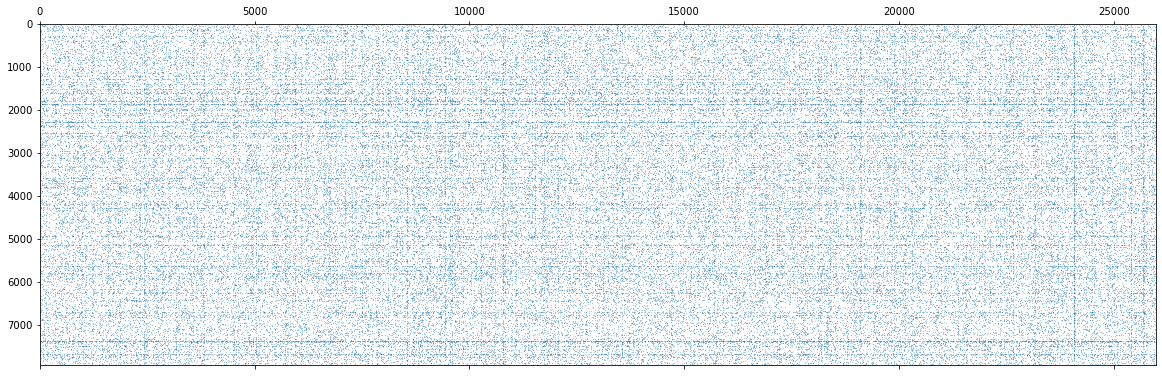

In [49]:
import scipy.sparse as sps
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.spy(URM_all, markersize=0.1)
plt.show()

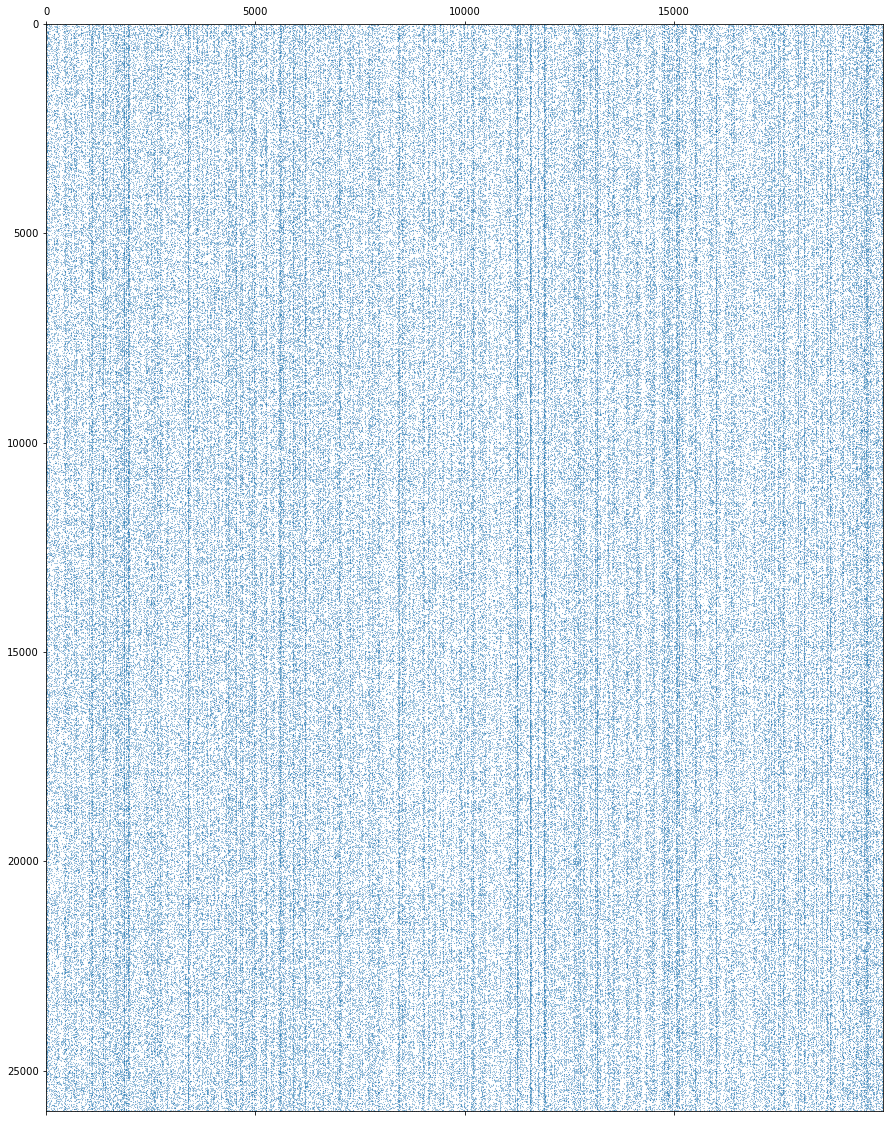

In [46]:
import scipy.sparse as sps
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.spy(ICM_all, markersize=0.1)
plt.show()